<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/income.csv")
df.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

Text(0, 0.5, 'Income($)')

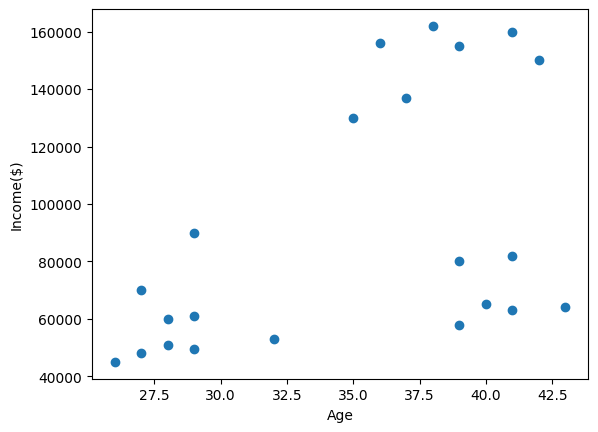

In [7]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['cluster']=y_predicted
df.head()

Name  Age  Income($)  cluster
0      Rob   27      70000        2
1  Michael   29      90000        2
2    Mohan   29      61000        0
3   Ismail   28      60000        0
4     Kory   42     150000        1

In [10]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

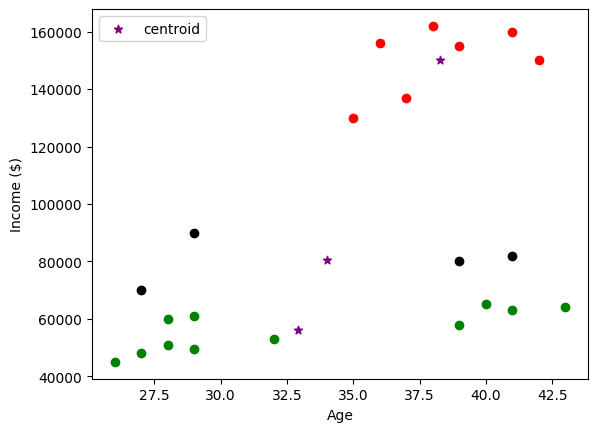

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [13]:
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        2
1  Michael  0.176471   0.384615        2
2    Mohan  0.176471   0.136752        0
3   Ismail  0.117647   0.128205        0
4     Kory  0.941176   0.897436        1

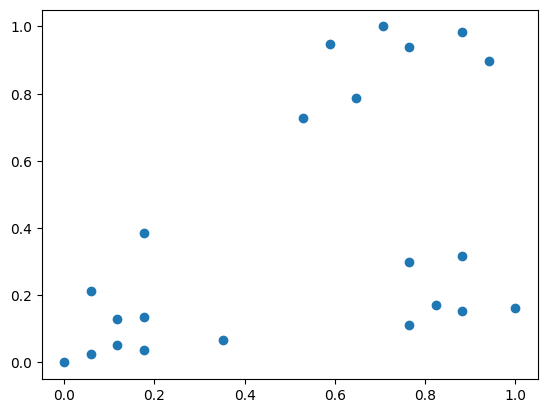

In [14]:
plt.scatter(df.Age,df['Income($)'])

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [16]:
df['cluster']=y_predicted
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        0
2    Mohan  0.176471   0.136752        0
3   Ismail  0.117647   0.128205        0
4     Kory  0.941176   0.897436        1

In [17]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

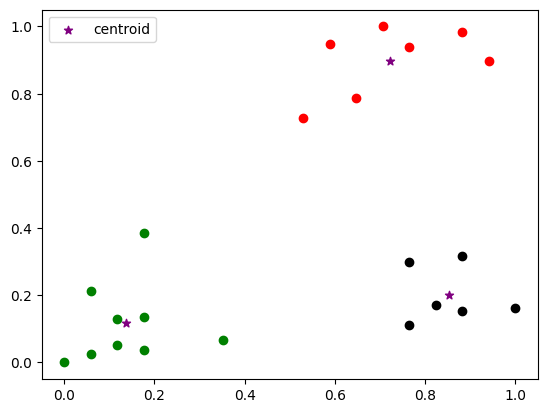

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

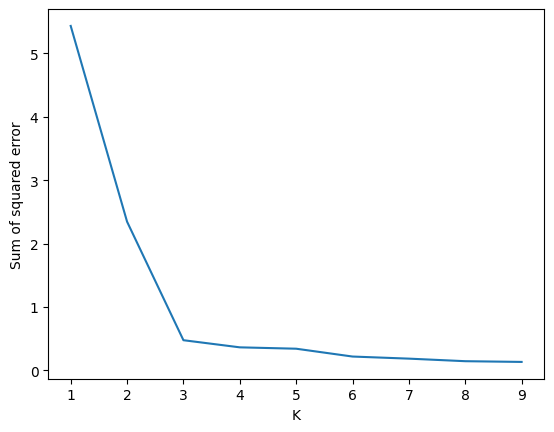

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)



---



For k = 2, Silhouette Score: 0.5305
For k = 3, Silhouette Score: 0.7130
For k = 4, Silhouette Score: 0.6136
For k = 5, Silhouette Score: 0.4663
For k = 6, Silhouette Score: 0.4579
For k = 7, Silhouette Score: 0.4494
For k = 8, Silhouette Score: 0.3155
For k = 9, Silhouette Score: 0.2898


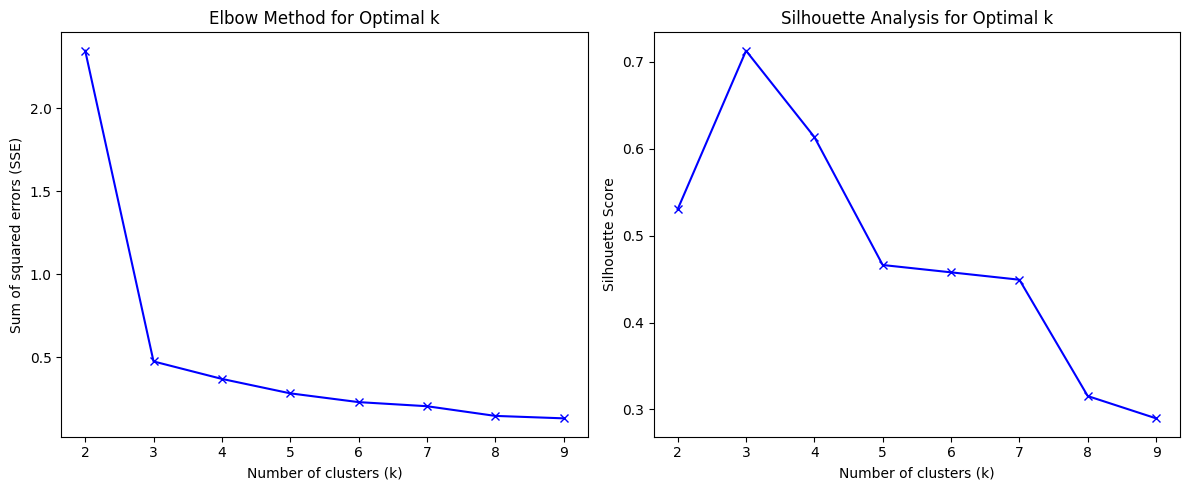


Optimal number of clusters (based on silhouette score): 3


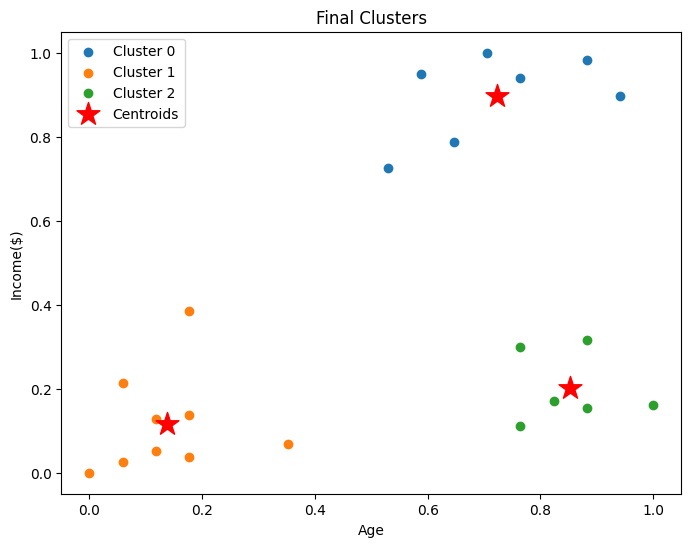

In [21]:
from sklearn.metrics import silhouette_score
import numpy as np
sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df[['Age','Income($)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

# Fit final model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
final_km.fit(df[['Age','Income($)']])
df['Cluster'] = final_km.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Age'],
                df[df['Cluster'] == i]['Income($)'],
                label=f'Cluster {i}')
plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Final Clusters')
plt.legend()
plt.show()

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

Iris data subset (Petal Length and Width):
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


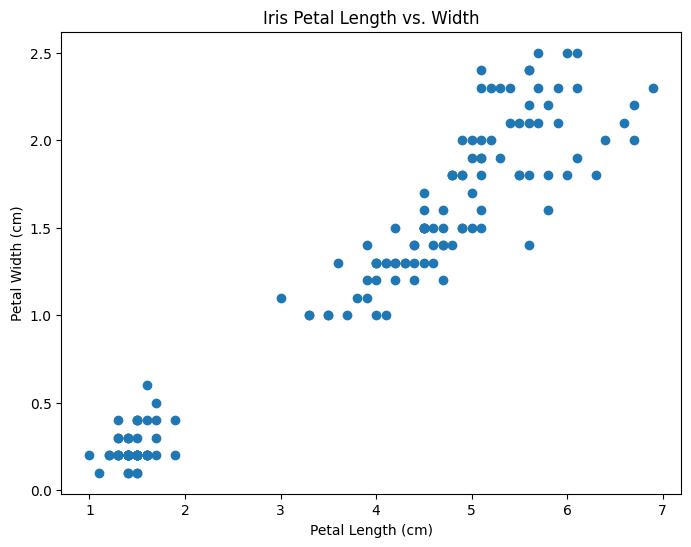

/tmp/ipython-input-15770475.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris_subset['cluster'] = y_predicted_iris


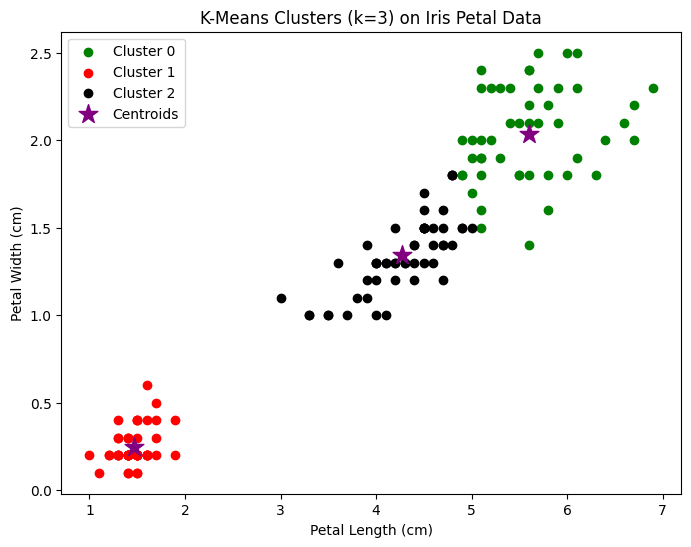

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris_subset = df_iris[['petal length (cm)', 'petal width (cm)']]

print("Iris data subset (Petal Length and Width):")
print(df_iris_subset.head())

plt.figure(figsize=(8, 6))
plt.scatter(df_iris_subset['petal length (cm)'], df_iris_subset['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Petal Length vs. Width')
plt.show()

km_iris = KMeans(n_clusters=3, random_state=42)
y_predicted_iris = km_iris.fit_predict(df_iris_subset)

df_iris_subset['cluster'] = y_predicted_iris

plt.figure(figsize=(8, 6))
df1 = df_iris_subset[df_iris_subset.cluster==0]
df2 = df_iris_subset[df_iris_subset.cluster==1]
df3 = df_iris_subset[df_iris_subset.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='black', label='Cluster 2')
plt.scatter(km_iris.cluster_centers_[:,0], km_iris.cluster_centers_[:,1], color='purple', marker='*', s=200, label='Centroids') # s increases marker size
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clusters (k=3) on Iris Petal Data')
plt.legend()
plt.show()

In [23]:
print("\nFeature Ranges:")
print(df_iris_subset[['petal length (cm)', 'petal width (cm)']].describe())


Feature Ranges:
       petal length (cm)  petal width (cm)
count         150.000000        150.000000
mean            3.758000          1.199333
std             1.765298          0.762238
min             1.000000          0.100000
25%             1.600000          0.300000
50%             4.350000          1.300000
75%             5.100000          1.800000
max             6.900000          2.500000


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler_iris = MinMaxScaler()

scaler_iris.fit(df_iris_subset[['petal length (cm)']])
df_iris_subset['petal length (cm)'] = scaler_iris.transform(df_iris_subset[['petal length (cm)']])

scaler_iris_width = MinMaxScaler()
scaler_iris_width.fit(df_iris_subset[['petal width (cm)']])
df_iris_subset['petal width (cm)'] = scaler_iris_width.transform(df_iris_subset[['petal width (cm)']])


print("\nScaled Iris data subset:")
print(df_iris_subset.head())


Scaled Iris data subset:
   petal length (cm)  petal width (cm)  cluster
0           0.067797          0.041667        1
1           0.067797          0.041667        1
2           0.050847          0.041667        1
3           0.084746          0.041667        1
4           0.067797          0.041667        1


/tmp/ipython-input-2878607115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris_subset['petal length (cm)'] = scaler_iris.transform(df_iris_subset[['petal length (cm)']])
/tmp/ipython-input-2878607115.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris_subset['petal width (cm)'] = scaler_iris_width.transform(df_iris_subset[['petal width (cm)']])


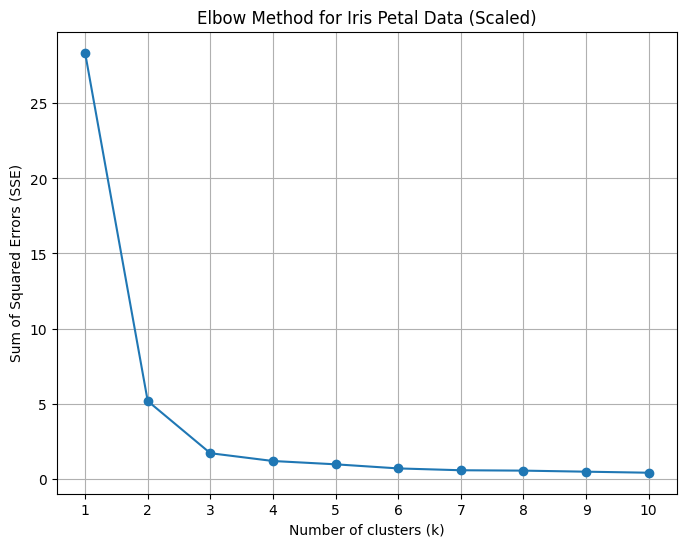

In [25]:
df_iris_scaled = df_iris_subset[['petal length (cm)', 'petal width (cm)']]

sse_iris = []
k_rng_iris = range(1, 11)

for k in k_rng_iris:
    km_loop = KMeans(n_clusters=k, random_state=42)
    km_loop.fit(df_iris_scaled)
    sse_iris.append(km_loop.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_rng_iris, sse_iris, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Iris Petal Data (Scaled)')
plt.xticks(k_rng_iris)
plt.grid(True)
plt.show()